In [1]:
import numpy as np
import matplotlib.pyplot as plt # For making plots
from sympy import *
from scipy import optimize
from scipy import interpolate
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import copy

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & \begin{cases}
w h_2 & 
\text{if }l_2 = 1  \\
b & \text{if }l_2 = 0 
\end{cases} \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_{1}& = & \begin{cases}
w h_1 & 
\text{if }l_1 = 1  \\
b & \text{if }l_1 = 0 
\end{cases} \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [3]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

To solve this problem we start by defining the utility function for each period. As we are asked to solve for period 2 first we also define the net-utility for this period, $v_2$

In [4]:
# First we define our function

# The first function is the consumption
def c(w,h,l,b):
    # Here we set the consumption to be either w*h if she works or b if she doesnt
    if l==1:
        c=w*h
    elif l==0:
        c=b
    return c

# We then define the utility function
def u(w,h,l,b,rho):
    return (c(w,h,l,b)**(1-rho))/(1-rho)

# And lastly we define the net utility function for period 2
def v2(w,h,l,b,rho,gamma):
    return u(w,h,l,b,rho)-gamma*l

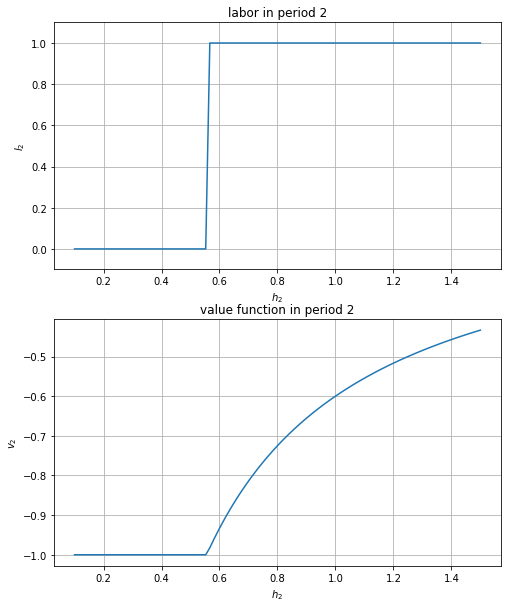

In [5]:
# We start by defining our function to solve the problem, where we set our parameters as variables
def solve_period_2(w,b,rho,gamma):
    
    # We set h2 as the h vector. And we set net-utility and labor as an empty array
    h2_vec=h_vec
    v2_vec = []
    l2_vec = []
    
    # We the make a loop for every value in the h vector. 
    for i, h2 in enumerate(h2_vec):
        
        # Here we say if the value of h makes the net-utility when working lower than when not working we set the labor supply to 0 and v2 to not working
        if v2(w,h2_vec[i],0,b,rho,gamma)>=v2(w,h2_vec[i],1,b,rho,gamma):
            l2_vec.append(0)
            v2_vec.append(v2(w,h_vec[i],0,b,rho,gamma))
    
        # Else we if she gets a higher utility by working we append l2=0 to the l2 array and we append the net utility when working to the v2 array
        elif v2(w,h2_vec[i],0,b,rho,gamma)<v2(w,h2_vec[i],1,b,rho,gamma):
            l2_vec.append(1)
            v2_vec.append(v2(w,h2_vec[i],1,b,rho,gamma))
    
    # And lastly we return our 3 vectors
    return h2_vec,l2_vec,v2_vec

# Then we make 2 plots of the labor and net-utility (both as functions of h)
fig = plt.figure(figsize=(8,10)) # We start by making the figure and setting the size
ax = fig.add_subplot(2,1,1) # We add the first subplot
ax.plot(solve_period_2(w,b,rho,gamma)[0],solve_period_2(w,b,rho,gamma)[1]) # We plot the labor supply as a function of h2
ax.grid() # We add a grid to the plot
ax.set_xlabel('$h_2$') # Adds label
ax.set_ylabel('$l_2$') # Adds label
ax.set_title('labor in period 2') # Adds title
ax.set_ylim(-0.1,1.1) # Sets boundaries for the y-axis

ax = fig.add_subplot(2,1,2) # Makes the second subplot
ax.plot(solve_period_2(w,b,rho,gamma)[0],solve_period_2(w,b,rho,gamma)[2]) # Plots the net-utility as a function of h2
ax.grid() # We add a grid
ax.set_xlabel('$h_2$') # Adds label
ax.set_ylabel('$v_2$') # Adds label
ax.set_title('value function in period 2'); # Adds title

In [6]:
# We find and print the value for the value of h, that makes the consumer work.
print(f'She decides to work when h2> {solve_period_2(w,b,rho,gamma)[0][np.unique(solve_period_2(w,b,rho,gamma)[1], return_counts=True)[1][0]]:.3f}')

She decides to work when h2> 0.567


We find that when the level of human capital is below 0.567, she won't work, because her net-utility, when not working, is higher. But when the human capital level is sufficiently high (above 0.567), she prefers to work.

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

In [7]:
# We start by using interpolate from the scipy package to make a grid for the net-utility in period 2, which we will need to solve the problem in period 1
v2_interp = interpolate.RegularGridInterpolator([solve_period_2(w,b,rho,gamma)[0]], solve_period_2(w,b,rho,gamma)[2], bounds_error=False,fill_value=None)

In [8]:
# First we define the net-utility in period 1
def v1(w,h,l,b,rho,gamma,Delta,v2_interp):
    
    # And since v1 depends of expected value of v2 plus (including delta in 50% of the cases),
    # we need to calculate the value for when delta applies and when we doesn't.
    
    # First we calculate when we have don't a delta, which gives the lowest value of h2 and therefore also v2
    h2_low = h+l
    v2_low = v2_interp([h2_low])[0]
    
    # Now we calculate when we have a delta
    h2_high = h+l+Delta
    v2_high = v2_interp([h2_high])[0]
    
    # We can now estimate the expected value of v2.
    v2 = 0.5*v2_low + 0.5*v2_high
    
    # And lastly we can return our net-utility function for period 1
    return u(w,h,l,b,rho)- gamma*l + beta*v2

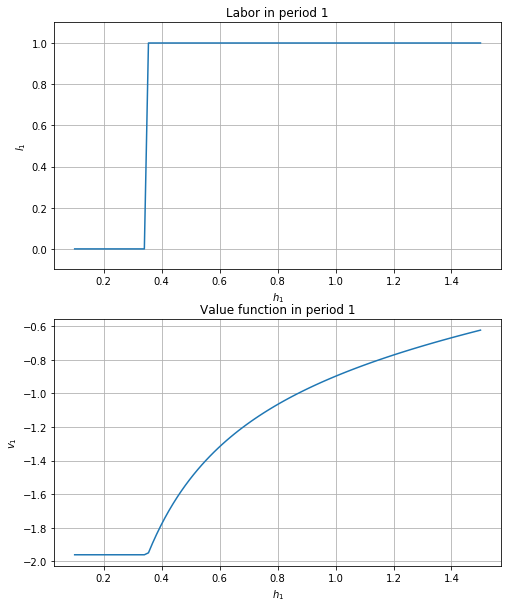

In [9]:
# As we did in period 1, we make a function to solve the problem
def solve_period_1(w,b,rho,gamma,Delta,v2_interp):
    
    # We set our vector and empty arrays
    h1_vec=h_vec
    v1_vec = []
    l1_vec = []
    
    # We make a for-loop for each h1 in the vector.
    for i, h1 in enumerate(h1_vec):
        
        # We compare the net-utilities to see which is higher and attach that value to the array along with the labor supply
        if v1(w,h1_vec[i],0,b,rho,gamma,Delta,v2_interp)>=v1(w,h1_vec[i],1,b,rho,gamma,Delta,v2_interp):
            l1_vec.append(0)
            v1_vec.append(v1(w,h1_vec[i],0,b,rho,gamma,Delta,v2_interp))
        elif v1(w,h1_vec[i],0,b,rho,gamma,Delta,v2_interp)<v1(w,h1_vec[i],1,b,rho,gamma,Delta,v2_interp):
            l1_vec.append(1)
            v1_vec.append(v1(w,h1_vec[i],1,b,rho,gamma,Delta,v2_interp))
    
    # We return the 3 vectors
    return h1_vec,l1_vec,v1_vec

# As we did in question 1 we make a plot of our results
fig = plt.figure(figsize=(8,10)) # Sets figure size
ax = fig.add_subplot(2,1,1) # Adds first subplot
ax.plot(solve_period_1(w,b,rho,gamma,Delta,v2_interp)[0],solve_period_1(w,b,rho,gamma,Delta,v2_interp)[1]) # plots labor as a function of h1
ax.grid() # Adds a grid
ax.set_xlabel('$h_1$') # Adds label
ax.set_ylabel('$l_1$') # Adds label
ax.set_title('Labor in period 1') # Adds title
ax.set_ylim(-0.1,1.1) # Sets boundaries for y

ax = fig.add_subplot(2,1,2) # Adds second subplot
ax.plot(solve_period_1(w,b,rho,gamma,Delta,v2_interp)[0],solve_period_1(w,b,rho,gamma,Delta,v2_interp)[2]) # plot net-utility in period 1 as a function of h1
ax.grid() # Adds grid
ax.set_xlabel('$h_1$') # Adds label
ax.set_ylabel('$v_1$') # Adds label
ax.set_title('Value function in period 1'); # Adds title

In [10]:
# We print the value for which she wants to work
print(f'She decides to work when h1> {solve_period_1(w,b,rho,gamma,Delta,v2_interp)[0][np.unique(solve_period_1(w,b,rho,gamma,Delta,v2_interp)[1], return_counts=True)[1][0]]:.3f}')

She decides to work when h1> 0.355


We conclude that she wants to work with a samller amount of human capital in period 1, which we would expect since working in periode 1 has a positive effect on her human capital level in period 2. So now she would work when the human capital level in period 1 is above 0.355

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

To check whether she wants to work when w<b, we set w=0.9, and the solve for the 2 periods.

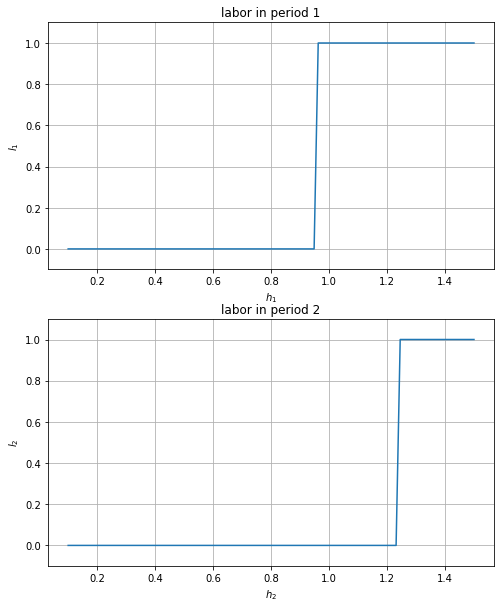

In [11]:
# We plot 2 figures. One of the labor supply in period 1 and one for the labor supply in period 2
fig = plt.figure(figsize=(8,10)) # Adds plot and set figure size
ax = fig.add_subplot(2,1,1) # Adds first subplot
ax.plot(solve_period_1(0.9,b,rho,gamma,Delta,v2_interp)[0],solve_period_1(0.9,b,rho,gamma,Delta,v2_interp)[1]) # Plots the labor in period 1 as a function of h1
ax.grid() # Adds grid
ax.set_xlabel('$h_1$') # Adds label
ax.set_ylabel('$l_1$') # Adds label
ax.set_title('labor in period 1') # Adds title
ax.set_ylim(-0.1,1.1) # Sets boundaries for the y-axis

ax = fig.add_subplot(2,1,2) # Adds the second subplot
ax.plot(solve_period_2(0.9,b,rho,gamma)[0],solve_period_2(0.9,b,rho,gamma)[1]) # Plots the labor supply in period 2 as a function of h2
ax.grid() # Adds grid
ax.set_xlabel('$h_2$') # Adds label
ax.set_ylabel('$l_2$') # Adds label
ax.set_title('labor in period 2') # Adds titel
ax.set_ylim(-0.1,1.1); # Sets boundaries for y-axis

In [12]:
# Print for which value of h (both 1 and 2) she will start working
print(f'She decides to work in period 1 for h1> {solve_period_1(0.9,b,rho,gamma,Delta,v2_interp)[0][np.unique(solve_period_1(0.9,b,rho,gamma,Delta,v2_interp)[1], return_counts=True)[1][0]]:.3f}')
print(f'And in period 2 for h2> {solve_period_2(0.9,b,rho,gamma)[0][np.unique(solve_period_2(0.9,b,rho,gamma)[1], return_counts=True)[1][0]]:.3f}')

She decides to work in period 1 for h1> 0.963
And in period 2 for h2> 1.245


We conclude that she still wants to work if w<b. This is due to the fact that she also gets paid by her productivity (human capital) and if the human capital level gets above 0.96 in period 1 or 1.25 in period 2, she would start working since her net-utility from working becomes higher than from not working, based on $w=0-9$. A smaller $w$ would require a higher level of human capital and if it gets small enough, the human capital vector won't be enough for her to benefit from working.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [13]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.


The function for pi_t and y_t becomes


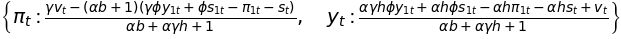

In [14]:
# We set the method of printing
init_printing(use_unicode=True)

# We define all the variables
y_t, pi_t, v_t, y_1t, s_t, s_1t, pi_1t, alpha, h, b, phi, gamma= symbols('y_t pi_t v_t y_1t s_t s_1t pi_1t alpha h b phi gamma')

# We write up our demand function and our supply (AD and SRAS)
Demmand = Eq((1/(h*alpha))*(v_t-(1+alpha*b)*y_t), pi_t)
Supply = Eq(pi_1t+gamma*y_t-phi*gamma*y_1t+s_t-phi*s_1t, pi_t)

# And the we use sympy to solve it for both y_t and pi_t
solution_set = solve([Demmand,Supply], y_t, pi_t, dict=True)

# To get the solution from the solution_set we need to get the first part of the array
solution_set = solution_set[0]

# Then we make a function for the optimal value of y_t and pi_t which we will be using later.
y_t_func=lambdify((v_t, y_1t, s_t, s_1t, pi_1t, alpha, h, b, phi, gamma),solution_set[y_t])
pi_t_func=lambdify((v_t, y_1t, s_t, s_1t, pi_1t, alpha, h, b, phi, gamma),solution_set[pi_t])

# And lastly we print the solution
print('The function for pi_t and y_t becomes')
solution_set

And if we insert the parameters, we get the following 2 functions.

The first function is the function for $y_t$.

In [15]:
# Here we use the function for y_t_func as we defined before and insert our parameters
y_t_func(v_t,y_1t,s_t,s_1t,pi_1t,par['alpha'],par['h'],par['b'],par['phi'],par['gamma'])

And the next function is a function of $\pi_t$

In [16]:
# Here we use the function for pi_t_func as we defined before and insert our parameters
pi_t_func(v_t,y_1t,s_t,s_1t,pi_1t,par['alpha'],par['h'],par['b'],par['phi'],par['gamma'])

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

We start by calculating $\pi^{\star}$ and $y^{\star}$ for the 2 instances

First we do it for $y_{1t}=pi_{1t}=v_t=s_t=s_{1t}=0$

In [17]:
#Here we find the value for pi_star and print it
print('pi_star is then equal to')
pi_t_star=pi_t_func(0,0,0,0,0,par['alpha'],par['h'],par['b'],par['phi'],par['gamma'])
pi_t_star

pi_star is then equal to


In [18]:
#Here we find the value for y_star and print it
print('And y_star is then equal to')
y_t_star=y_t_func(0,0,0,0,0,par['alpha'],par['h'],par['b'],par['phi'],par['gamma'])
y_t_star

And y_star is then equal to


Secondly, we set $y_{1t}=pi_{1t}=s_t=s_{1t}=0$ and change $v_t$ to be 0.1. We hereby get:

In [19]:
#Here we find the value for pi_star and print it
print('pi_star the becomes:')
pi_t_star2=round(pi_t_func(0.1,0,0,0,0,par['alpha'],par['h'],par['b'],par['phi'],par['gamma']),4)
pi_t_star2

pi_star the becomes:


In [20]:
#Here we find the value for pi_star and print it
print('And y_star becomes:')
y_t_star2=round(y_t_func(0.1,0,0,0,0,par['alpha'],par['h'],par['b'],par['phi'],par['gamma']),4)
y_t_star2

And y_star becomes:


We hereby get that due to the shock to $v_t$ we get a higher value of both $\pi$ and $y$ in the equlibrium.

Next we illustrate the 2 solutions. And since the AD curve is the only one depending on $v_t$, we know that SRAS isn't going to change.

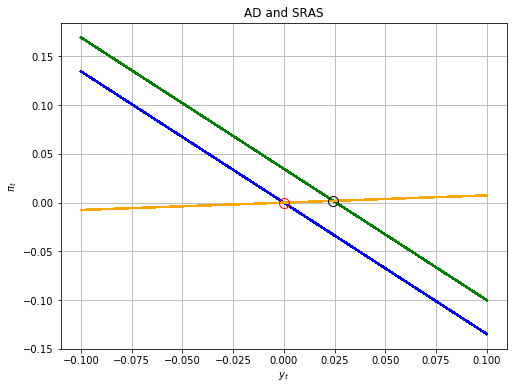

In [21]:
# First we define the AD-curve
def AD(v_t,y_t): 
    return 1/(par['h']*par['alpha'])*(v_t-(1+par['b']*par['alpha'])*y_t)
                        
# Next we define the SRAS-curve                      
def SRAS(pi_1t,y_t,y_1t,s_t,s_1t): 
    return pi_1t+par['gamma']*y_t-par['phi']*par['gamma']*y_1t+s_t-par['phi']*s_1t

# Now we create a vector of y-values for -0.1 to 0.1 (The space is set to better focus on the solution)
N=500 # Defines N
shape_tuple = (N,N) # Defines the tuple
y_values = np.empty(shape_tuple) # Makes an empty space

# Now we make a double loop to get a vector N values between -0.1 and 0.1
for i in range(N): # 0,1,...,N-1
    for j in range(N): # 0,1,...,N-1
        y_values[i,j] = (i/(N-1))*0.2-0.1 # in [-0.1,0.1]

# We then make a plot
fig = plt.figure(figsize=(8,6)) # We define the figure size
ax = fig.add_subplot(1,1,1) # We add a subplot
ax.plot(y_values,AD(0,y_values), 'blue') # We insert the first AD curve where v_t = 0
ax.plot(y_values,AD(0.1,y_values), 'green') # We insert the second AD curve for when v_t=0.1
ax.plot(y_values,SRAS(0,y_values,y_values-1,0,0), 'orange') # Here we insert the SRAS
ax.plot(y_t_star,pi_t_star, color='red', marker='o', linestyle='dashed', linewidth=5, markersize=10, fillstyle='none') # We mark the first solution with a red circle
ax.plot(y_t_star2,pi_t_star2, color='black', marker='o', linestyle='dashed', linewidth=5, markersize=10, fillstyle='none') # We then mark the second solution with a black circle
ax.grid() # Adds grid
ax.set_xlabel('$y_t$') # Adds label
ax.set_ylabel('$\pi_t$') # Adds label
ax.set_title('AD and SRAS'); # Adds title

First notice that the green curve is the AD curve for when $v_t=0.1$ and the blue curve is the AD curve for when $v_t=0$. The orange curve is the SRAS curve.

We can conclude that when we change the value of $v_t$ we move the AD curve, and when we increase it, we move the AD-curve to the rigth, which gives a higher value of $y^{\star}$ and $pi^{\star}$.


**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [22]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

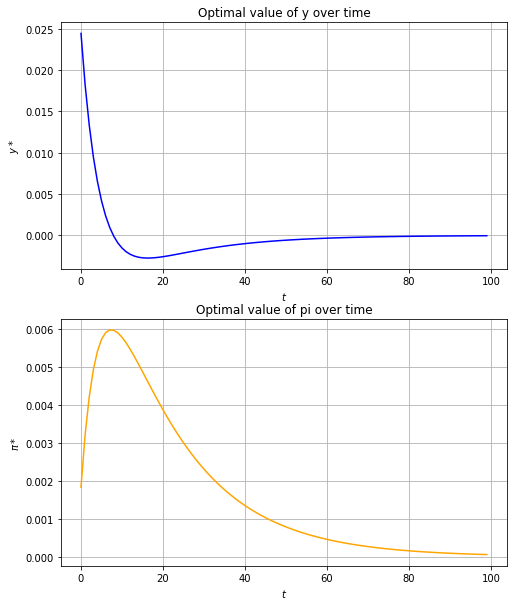

In [23]:
# We start by making an array of the parameters. We do this by creating an empty array and then make a loop that append the parameter value each time
# We use i from 1-1000 for all parameters since we are going to use this in a later question, but we set the rest of the range to be from 0 to 100
# Phi
phi_t = []
def phi_t_func():
    for i in range(0,1000): 
        phi_i = par['phi']
        phi_t.append(phi_i)
phi_t_func();

# Gamma
gamma_t = []
def gamma_t_func():
    for i in range(0,1000): 
        gamma_i = par['gamma']
        gamma_t.append(gamma_i)
gamma_t_func();

# Alpha
alpha_t = []
def alpha_t_func():
    for i in range(0,1000): 
        alpha_i = par['alpha']
        alpha_t.append(alpha_i)
alpha_t_func();

# b
b_t = []
def b_t_func():
    for i in range(0,1000): 
        b_i = par['b']
        b_t.append(b_i)
b_t_func();

# h
h_t = []
def h_t_func():
    for i in range(0,1000): 
        h_i = par['h']
        h_t.append(h_i)
h_t_func();

# Next we do the same for v_t and s_t but we append the function.

# s_t
s_t = []
def s_t_func():
    for i in range(0,100): 
        s_i = par['omega']*0
        s_t.append(s_i)
s_t_func();

# v_t 
v_t = []
v_t_start = par['delta'] * 0 + 0.1 # We start by appending a start value since we need a starting point in order to refer to a previous value
v_t.append(v_t_start)
def v_t_func():
    for i in range(1,100): 
        v_i = par['delta']*v_t[i-1]
        v_t.append(v_i)
v_t_func();

# Then we define pi_star and y_star as an empty array and set the starting point to the value from question 2
pi_t_star = []
pi_star_start=pi_t_func(v_t=v_t[0],y_1t=0,s_t=s_t[0],s_1t=0,pi_1t=0, alpha=alpha_t[0], h=h_t[0], b=b_t[0], phi=phi_t[0], gamma=gamma_t[0])
pi_t_star.append(pi_star_start)
y_t_star = []
y_star_start=y_t_func(v_t=v_t[0],y_1t=0,s_t=s_t[0],s_1t=0,pi_1t=0, alpha=alpha_t[0], h=h_t[0], b=b_t[0], phi=phi_t[0], gamma=gamma_t[0])
y_t_star.append(y_star_start)

# We then make a loop to find pi_star and y_star over time and we again append the values we find to create an array 
def pi_and_y_star(): 
    for i in range(1,100):
        
        y_i_star = y_t_func(v_t=v_t[i],y_1t=y_t_star[i-1],s_t=s_t[i],s_1t=s_t[i-1],pi_1t=pi_t_star[i-1], alpha=alpha_t[i], h=h_t[i], b=b_t[i], phi=phi_t[i], gamma=gamma_t[i])
        y_t_star.append(y_i_star)
        
        pi_i_star = pi_t_func(v_t=v_t[i],y_1t=y_t_star[i-1],s_t=s_t[i],s_1t=s_t[i-1],pi_1t=pi_t_star[i-1], alpha=alpha_t[i], h=h_t[i], b=b_t[i], phi=phi_t[i], gamma=gamma_t[i])
        pi_t_star.append(pi_i_star)

pi_and_y_star();

# We then make a plot of the solution
fig = plt.figure(figsize=(8,10)) # Add figure with figure size
ax = fig.add_subplot(2,1,1) # Add subplot 1
ax.plot(y_t_star, 'blue') # Plot the y_star array
ax.grid() # Add grid
ax.set_xlabel('$t$') # Add label
ax.set_ylabel('$y*$') # Add label
ax.set_title('Optimal value of y over time') # Add title

ax = fig.add_subplot(2,1,2) # Add second subplot
ax.plot(pi_t_star, 'orange') # Plot pi_star
ax.grid() # Add grid
ax.set_xlabel('$t$') # Add label
ax.set_ylabel('$\pi*$') # Add label
ax.set_title('Optimal value of pi over time'); # Add title

We conclude that from the shock occurs in period 0 to it has converged back to the steady state approximately 100 periods have passed. We also see that $y_t$ converges faster towards the steady state than $\pi_t$. The full effect of the shock only occurs after approximately 10 periods, and we see that $y_t$ starts out positive but due to the high inflation rate, the growth rate of the GDP becomes negative. 

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [24]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [25]:
# Since we use a randomizer we set a seed number in order to get the same result each time we run the code.
seed = 1986
np.random.seed(seed)

# We now set s_t and v_t using the new formula

# s_t
s_t_1 = []
s_t_start_1 = par['omega'] * 0 + np.random.normal(0,par['sigma_c'])
s_t_1.append(s_t_start_1)
def s_t_func_1():
    for i in range(1,1000): 
        s_i_1 = par['omega']*s_t_1[i-1]+np.random.normal(0,par['sigma_c'])
        s_t_1.append(s_i_1)
s_t_func_1();

# v_t
v_t_1 = []
v_t_start_1 = par['delta'] * 0 + np.random.normal(0,par['sigma_x'])
v_t_1.append(v_t_start_1)
def v_t_func_1():
    for i in range(1,1000): 
        v_i_1 = par['delta']*v_t_1[i-1]+np.random.normal(0,par['sigma_x'])
        v_t_1.append(v_i_1)
v_t_func_1();

# We define a vector consisting of zeros
zero_array = []
def zero_array_func():
    for i in range(0,1000): 
        zero_i = 0
        zero_array.append(zero_i)
zero_array_func();

# And then we make our pi_star and y_star vector
pi_t_star_1 = []
pi_star_start_1 = pi_t_func(v_t=v_t_1[0],y_1t=zero_array[0],s_t=s_t_1[0],s_1t=zero_array[0],pi_1t=zero_array[0], alpha=alpha_t[0], h=h_t[0], b=b_t[0], phi=phi_t[0], gamma=gamma_t[0])
pi_t_star_1.append(pi_star_start_1)
y_t_star_1 = []
y_star_start_1 = y_t_func(v_t=v_t_1[0],y_1t=zero_array[0],s_t=s_t_1[0],s_1t=zero_array[0],pi_1t=zero_array[0], alpha=alpha_t[0], h=h_t[0], b=b_t[0], phi=phi_t[0], gamma=gamma_t[0])
y_t_star_1.append(y_star_start_1)
def pi_and_y_star_1(): 
    for i in range(1,1000):
        
        y_i_star_1 = y_t_func(v_t=v_t_1[i],y_1t=y_t_star_1[i-1],s_t=s_t_1[i],s_1t=s_t_1[i-1],pi_1t=pi_t_star_1[i-1], alpha=alpha_t[i], h=h_t[i], b=b_t[i], phi=phi_t[i], gamma=gamma_t[i])
        y_t_star_1.append(y_i_star_1)
        
        pi_i_star_1 = pi_t_func(v_t=v_t_1[i],y_1t=y_t_star_1[i-1],s_t=s_t_1[i],s_1t=s_t_1[i-1],pi_1t=pi_t_star_1[i-1], alpha=alpha_t[i], h=h_t[i], b=b_t[i], phi=phi_t[i], gamma=gamma_t[i])
        pi_t_star_1.append(pi_i_star_1)

pi_and_y_star_1();

In [26]:
# We start by finding the variance and the correlation between pi and y and then printing the results
var_y=np.var(y_t_star_1)
var_pi=np.var(pi_t_star_1)
corr_y_pi=np.corrcoef(y_t_star_1,pi_t_star_1)
print(f'Var(y_t)  = {var_y:.2f}')
print(f'Var(pi_t)  = {var_pi:.2f}')
print(f'Corr(y_t,pi_t)  = {corr_y_pi[1][0]:.2f}')

# We then copy the vector of y_star and pi_star, and the delete the first observation. 
# This way we set the vector one back, this way we can calculate and print the autocorrelation of y_star and pi_star
y_t_star_2=copy.copy(y_t_star_1)
del y_t_star_2[0]
corr_y=np.corrcoef(y_t_star_1[:999],y_t_star_2)
print(f'Corr(y_t,y_t-1)  = {corr_y[1][0]:.2f}')
pi_t_star_2=copy.copy(pi_t_star_1)
del pi_t_star_2[0]
corr_pi=np.corrcoef(pi_t_star_1[:999],pi_t_star_2)
print(f'Corr(pi_t,pi_t-1)  = {corr_pi[1][0]:.2f}')

Var(y_t)  = 2.01
Var(pi_t)  = 1.63
Corr(y_t,pi_t)  = -0.31
Corr(y_t,y_t-1)  = 0.78
Corr(pi_t,pi_t-1)  = 0.99


We see that the variance of $y^{\star}$ is bigger than the variance of $\pi^{\star}$, but the autocorrelation of $\pi^{\star}$ is bigger than for $y^{\star}$, we hereby get that there is a lot more persistence in $\pi^{\star}$. We also conclude that the 2 variables is negatively correlated. 

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

In [27]:
# We start by defining a function for pi_star and y_star that returns the correlation of y_star and pi_star. We define this function as a function of phi, which we note with the variable name q.
def pi_and_y_star_q5(q):
    pi_t_star_q = []
    pi_star_start_q = pi_t_func(v_t=v_t_1[0],y_1t=zero_array[0],s_t=s_t_1[0],s_1t=zero_array[0],pi_1t=zero_array[0], alpha=alpha_t[0], h=h_t[0], b=b_t[0], phi=q, gamma=gamma_t[0])
    pi_t_star_q.append(pi_star_start_q)
    y_t_star_q = []
    y_star_start_q = y_t_func(v_t=v_t_1[0],y_1t=zero_array[0],s_t=s_t_1[0],s_1t=zero_array[0],pi_1t=zero_array[0], alpha=alpha_t[0], h=h_t[0], b=b_t[0], phi=q, gamma=gamma_t[0])
    y_t_star_q.append(y_star_start_q)
    for i in range(1,1000):
        
        y_i_star_q = y_t_func(v_t=v_t_1[i],y_1t=y_t_star_q[i-1],s_t=s_t_1[i],s_1t=s_t_1[i-1],pi_1t=pi_t_star_q[i-1], alpha=alpha_t[i], h=h_t[i], b=b_t[i], phi=q, gamma=gamma_t[i])
        y_t_star_q.append(y_i_star_q)
        
        pi_i_star_q = pi_t_func(v_t=v_t_1[i],y_1t=y_t_star_q[i-1],s_t=s_t_1[i],s_1t=s_t_1[i-1],pi_1t=pi_t_star_q[i-1], alpha=alpha_t[i], h=h_t[i], b=b_t[i], phi=q, gamma=gamma_t[i])
        pi_t_star_q.append(pi_i_star_q)
        
    return np.corrcoef(y_t_star_q,pi_t_star_q)[1][0]

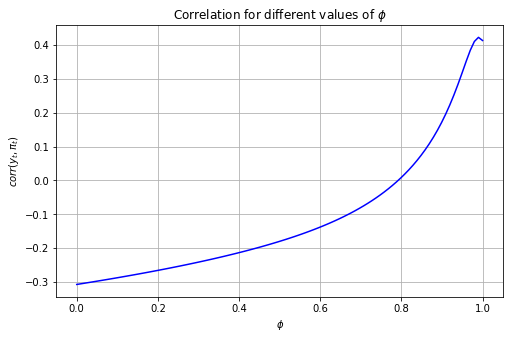

In [28]:
# We then create a vector from 0 to 1 with 100 steps
x = np.linspace(0,1,100)
# And we create an empty numpy with 100 slots
corr_y_pi = np.empty(100)
# We then make a loop to create a vector of the correlation depending on phi.
for i,X in enumerate(x):
    corr_y_pi[i] = pi_and_y_star_q5(X)
    
# We then plot the result
fig = plt.figure(figsize=(8,5)) # Define figure size
ax = fig.add_subplot(1,1,1) # Adds subplot
ax.plot(x,corr_y_pi, 'blue') # Plots the correlation as a function of phi (which is the x linespace)
ax.grid() # Adds grid
ax.set_xlabel('$\phi$') # Adds label
ax.set_ylabel('$corr(y_t,\pi_t)$') # Adds label
ax.set_title('Correlation for different values of $\phi$'); # Adds titel

In [29]:
# We then make a function, which is the quadratic value of correlation function minus our desired value.
# We do this to create a function, that when minimized (which is when it is equal to 0) gives the desired value
obj = lambda q: (pi_and_y_star_q5(q)-0.31)**2
# We then use scipy optimize to optimize the function
solution_q5=optimize.minimize_scalar(obj,0, method='bounded',bounds=(0,1))
# And lastly we print the value, phi, which makes us get to the desired value
print(f'Corr(y_t,pi_t) is equal to 0.31 when phi = {solution_q5.x:.4f}')

Corr(y_t,pi_t) is equal to 0.31 when phi = 0.9475


We conclude that $\phi$ has a positive effect on the correlation (except when it becomes approximatly 1). We also find that when $\phi=0.9475$ the correlation between $y^{\star}$ and $\pi^{\star}$ becomes 0.31

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

In [30]:
# We start by creating a function that uses the inputs of sigma_c, sigma_x and phi. And it return the variances, correlation and autocorrelations of both y_star and pi_star
def pi_and_y_star_q6(x,y,z):
    # We set the seednumber to the same as before, but since we draw our number in a different order, the result wont be the same, but we still do this in order to get the same result every time we run the code.
    np.random.seed(seed)     
    
    # We then create an empty array for s_t, v_t, pi_star and y_star. And we the append the starting value.
    s_t_q6 = []
    s_t_start_q6 = par['omega'] * 0 + np.random.normal(0,x)
    s_t_q6.append(s_t_start_q6)
    v_t_q6 = []
    v_t_start_q6 = par['delta'] * 0 + np.random.normal(0,y)
    v_t_q6.append(v_t_start_q6)
    pi_t_star_q6 = []
    pi_star_start_q6 = pi_t_func(v_t=v_t_q6[0],y_1t=zero_array[0],s_t=s_t_q6[0],s_1t=zero_array[0],pi_1t=zero_array[0], alpha=alpha_t[0], h=h_t[0], b=b_t[0], phi=z, gamma=gamma_t[0])
    pi_t_star_q6.append(pi_star_start_q6)
    y_t_star_q6 = []
    y_star_start_q6 = y_t_func(v_t=v_t_q6[0],y_1t=zero_array[0],s_t=s_t_q6[0],s_1t=zero_array[0],pi_1t=zero_array[0], alpha=alpha_t[0], h=h_t[0], b=b_t[0], phi=z, gamma=gamma_t[0])
    y_t_star_q6.append(y_star_start_q6)
    
    # Next we make a loop that append the last 999 values, which is the same process as earlier.
    for i in range(1,1000):
        s_i_q6 = par['omega']*s_t_q6[i-1]+np.random.normal(0,x)
        s_t_q6.append(s_i_q6)
        v_i_q6 = par['delta']*v_t_q6[i-1]+np.random.normal(0,y)
        v_t_q6.append(v_i_q6)
        y_i_star_q6 = y_t_func(v_t=v_t_q6[i],y_1t=y_t_star_q6[i-1],s_t=s_t_q6[i],s_1t=s_t_q6[i-1],pi_1t=pi_t_star_q6[i-1], alpha=alpha_t[i], h=h_t[i], b=b_t[i], phi=z, gamma=gamma_t[i])
        y_t_star_q6.append(y_i_star_q6)
        pi_i_star_q6 = pi_t_func(v_t=v_t_q6[i],y_1t=y_t_star_q6[i-1],s_t=s_t_q6[i],s_1t=s_t_q6[i-1],pi_1t=pi_t_star_q6[i-1], alpha=alpha_t[i], h=h_t[i], b=b_t[i], phi=z, gamma=gamma_t[i])
        pi_t_star_q6.append(pi_i_star_q6)
    
    # Then we create a copy of y_star and pi_star in order to make the autocorrelation the same way as in question 2.4
    y_t_star_q6_2=copy.copy(y_t_star_q6)
    del y_t_star_q6_2[0]
    pi_t_star_q6_2=copy.copy(pi_t_star_q6)
    del pi_t_star_q6_2[0]
    
    # And lastly we return all the 2 variances, the correlation and the 2 autocorrelations.
    return [np.var(y_t_star_q6),np.var(pi_t_star_q6),np.corrcoef(y_t_star_q6,pi_t_star_q6)[1][0],np.corrcoef(y_t_star_q6[:999],y_t_star_q6_2)[1][0],np.corrcoef(pi_t_star_q6[:999],pi_t_star_q6_2)[1][0]]

In [31]:
# We then create a function as in question 2.5 which is above 0 for all values and it has it is minimized in 0. And when the function is 0, we get all the desired values
def function_for_q6(x,y,z):
    return (pi_and_y_star_q6(x,y,z)[0]-1.64)**2+(pi_and_y_star_q6(x,y,z)[1]-0.21)**2+(pi_and_y_star_q6(x,y,z)[2]-0.31)**2+(pi_and_y_star_q6(x,y,z)[3]-0.84)**2+(pi_and_y_star_q6(x,y,z)[4]-0.48)**2

# We then define a the same function but where we set create one value for the 3 variables
def f(params):
    x, y, z = params # the 3 variables are set equal to params
    return function_for_q6(x,y,z) # And we return the function from above

# We then define our initial guess, which is set to our initial values
initial_guess = [par['sigma_c'], par['sigma_x'], par['phi']]

# And then we optimize the function with regards to the variables in params. We also bounds the sigmas to be between 0 and 50 (50 is chosen but it sigma has no upper restriction) and phi to be between 0 and 1.
result = optimize.minimize(f, initial_guess, bounds=[(0,50),(0,50),(0,1)])

# We then print the result. 
# First we print the variables
print(f'We get the closest values when sigma_c = {result.x[0]:.4f}')
print(f'We get the closest values when sigma_x = {result.x[1]:.4f}')
print(f'We get the closest values when phi = {result.x[2]:.4f}')

print('')

# And then we print our variances, correlations and autocorrelations
print('When we set these values we get the following result:')
print(f'We get the following variance of y = {pi_and_y_star_q6(result.x[0],result.x[1],result.x[2])[0]:.2f}')
print(f'We get the following variance of pi = {pi_and_y_star_q6(result.x[0],result.x[1],result.x[2])[1]:.2f}')
print(f'We get the following correlation between y and pi = {pi_and_y_star_q6(result.x[0],result.x[1],result.x[2])[2]:.2f}')
print(f'We get the following correlation between y_t-1 and y_t = {pi_and_y_star_q6(result.x[0],result.x[1],result.x[2])[3]:.2f}')
print(f'We get the following correlation between pi_t-1 and pi_t = {pi_and_y_star_q6(result.x[0],result.x[1],result.x[2])[4]:.2f}')

We get the closest values when sigma_c = 0.2183
We get the closest values when sigma_x = 3.1916
We get the closest values when phi = 0.9606

When we set these values we get the following result:
We get the following variance of y = 1.65
We get the following variance of pi = 0.07
We get the following correlation between y and pi = 0.27
We get the following correlation between y_t-1 and y_t = 0.78
We get the following correlation between pi_t-1 and pi_t = 0.49


We conclude that for $\sigma_c=0.2183$, $\sigma_x=3.1916$ and $\phi=0.9606$, we get closest to the desired values, but we do not reach them all. We get fairly close to the variance of $y$ and the autocorrelation of $\pi$. These are only off by approximately 0.01. When we look at the autocorrelation for $y$ and the correlation between $y$ and $\pi$, we get a difference between our estimates and the estimates of the US maret of 0.06 and 0.04, respectively. And lastly, when we compare the estimated variance of $\pi$ with the one in the US, we see that our value is 0.14 smaller than the desired value. We therefore conclude that our estimates is close to the ones found in the data of the US buisness cycle. 

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [32]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.


To find the budget shares for each good across the agents, we need to consider the optimal choices of goods, which is represented by $x_{i}^{\star j}$ from the question.
By rewriting this we get the following expression: 
\begin{eqnarray*}
&\beta^{j}_i = \frac{x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) p_{i}}{I^j} \\
\end{eqnarray*}
From this equation we find the budget shares of good i and consumer j on the left-handside and see that these are equal to $\beta_{i}^{j}$. This means that we can plot the budget shares by isolating the betas for each combination of \\( i \in \{1,2,3\} \\) and \\( j \in \{1,2,\dots,50000\} \\).



In [33]:
# Seperating the betas fra the collective set.
beta_1 = betas[:,0] # all betas for i=1
beta_2 = betas[:,1] # all betas for i=2
beta_3 = betas[:,2] # all betas for i=3

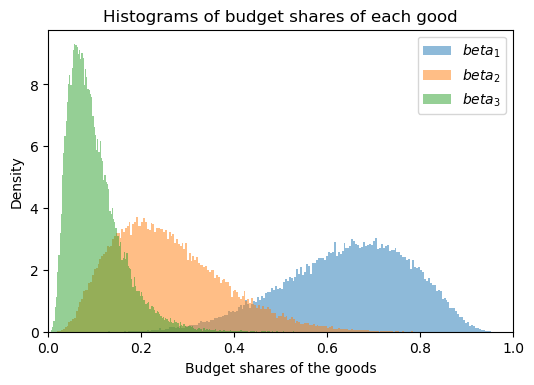

In [34]:
fig = plt.figure(dpi=100) # Figure size
ax = fig.add_subplot(1,1,1) # Initiation plot
ax.hist(beta_1,bins=200,density=True,alpha=0.5,label='$beta_1$') # Histogram for beta_1
ax.hist(beta_2,bins=200,density=True,alpha=0.5,label='$beta_2$') # Histogram for beta_2
ax.hist(beta_3,bins=200,density=True,alpha=0.5,label='$beta_3$') # Histogram for beta_3
ax.set_xlim([0,1]) # Limits the x-axis, here corresponding to the beta-values
ax.set_title('Histograms of budget shares of each good') # Adds title
ax.set_xlabel('Budget shares of the goods') # Adds label
ax.set_ylabel('Density') # Adds label
ax.legend(loc='upper right'); # Adds legend

From the figure we see that, in generel, good 1 accounts for most of the budget, while good 2 accounts for secound most and good 3 accounts for the least. The reason behind these results lays within the parameters given. While most parameters are the same, $\mu$ is at the value of 3 for good 1, 2 for good 2 and 1 for good 3. This affects the values of $\alpha$ which affects the values of $\beta$. Had $\mu$ been equal for all, then the distribution of $\beta_i$ would be approximately the same for all $i$.
In more economical term the consumers have a higher preference for good 1, than good 2 and a higher preference for good 2 than good 3. However, they prefer it it in moderate relations, such that none of good 3 means that no utility is gained from good 1 and 2.




Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

In [35]:
# Define the income function
def income(p1,p2,e1,e2,e3):
    return p1*e1+p2*e2+e3

# Define the demand function for x1
def x1_demand(p1,p2,e1,e2,e3):
    return beta_1*income(p1,p2,e1,e2,e3)/p1

# Define the demand function for x2
def x2_demand(p1,p2,e1,e2,e3):
    return beta_2*income(p1,p2,e1,e2,e3)/p2

# Define the demand function for x3
def x3_demand(p1,p2,e1,e2,e3):
    return beta_3*income(p1,p2,e1,e2,e3)

# Define the demand - supply for x1
def x1_excess_demand(p1,p2,e1,e2,e3):
    return np.sum(x1_demand(p1,p2,e1,e2,e3)-e1)

# Define the demand - supply for x2
def x2_excess_demand(p1,p2,e1,e2,e3):
    return np.sum(x2_demand(p1,p2,e1,e2,e3)-e2)

# Define the demand - supply for x3
def x3_excess_demand(p1,p2,e1,e2,e3):
    return np.sum(x3_demand(p1,p2,e1,e2,e3)-e3)

In [36]:
# Create a vector of value from 0.1 to 10 with 100 values for both p1 and p2
p1_values = np.linspace(0.1,10,100)
p2_values = np.linspace(0.1,10,100)

# We then create a grid of p1 and p2
p1_values2, p2_values2 = np.meshgrid(p1_values, p2_values)

# And lastly we create a loop, for which we are appending values for our 3 excess demand functions
shape_tuple = (100,100)
x1_excess_demand_2 = np.empty(shape_tuple)
x2_excess_demand_2 = np.empty(shape_tuple)
x3_excess_demand_2 = np.empty(shape_tuple)
for i, p1 in enumerate(p1_values):
    for j, p2 in enumerate(p2_values):
        x1_excess_demand_2[i,j] = x1_excess_demand(p1,p2,e1,e2,e3)
        x2_excess_demand_2[i,j] = x2_excess_demand(p1,p2,e1,e2,e3)
        x3_excess_demand_2[i,j] = x3_excess_demand(p1,p2,e1,e2,e3)

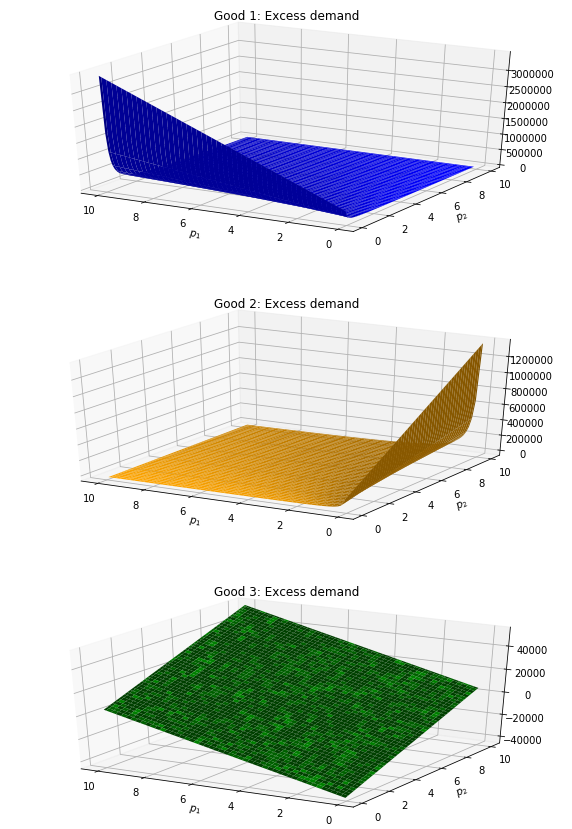

In [37]:
# We then make a plot of our findings
fig = plt.figure(figsize=(10,15)) # Sets fig size

ax1 = fig.add_subplot(311, projection='3d') # Adds 3D subplot
ax1.plot_surface(p1_values2,p2_values2,x1_excess_demand_2, color='blue') # Adds plot 3D plot of excess demand for good 1
ax1.set_title('Good 1: Excess demand') # Adds title
ax1.set_xlabel('$p_1$') # Adds label
ax1.set_ylabel('$p_2$') # Adds label
ax1.invert_xaxis() # Inverts axis

ax1 = fig.add_subplot(312, projection='3d') # Adds 3D subplot
ax1.plot_surface(p1_values2,p2_values2,x2_excess_demand_2, color='orange') # Adds plot 3D plot of excess demand for good 2
ax1.set_title('Good 2: Excess demand') # Adds title
ax1.set_xlabel('$p_1$') # Adds label
ax1.set_ylabel('$p_2$') # Adds label
ax1.invert_xaxis() # Inverts x_axis

ax1 = fig.add_subplot(313, projection='3d') # Adds 3D subplot
ax1.plot_surface(p1_values2,p2_values2,x3_excess_demand_2, color='green') # Adds plot 3D plot of excess demand for good 3
ax1.set_title('Good 3: Excess demand') # Adds title
ax1.set_xlabel('$p_1$') # Adds label
ax1.set_ylabel('$p_2$') # Adds label
ax1.invert_xaxis(); # Inverts x_axis

We see that the excess demands of the goods increases as the prices decreases. However, the effect of corresponding prices on the goods, eg. $p_1$ on $x_1$ is much larger than the effect of price 2 on good 1.

The excess demand of good 3 is linear as the price is set numeraire and depends on both prices, providing a larger excess demand for high prices levels on good 1 and 2 as they would want to substitute to good 3 instead.


**Question 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

We follow the process decribed above

In [38]:
# We start by creating a function that optimizes the price levels in a walras equilibrium
def Walras(p1,p2,e1,e2,e3):
    t=0
    while True: # Generates a while loop that find the solution for the prices given the parameters.
        x1_solution=x1_excess_demand(p1,p2,e1,e2,e3)
        x2_solution=x2_excess_demand(p1,p2,e1,e2,e3)
        if np.abs(x1_solution)<epsilon and np.abs(x2_solution)<epsilon: # Continues the iterations if the tolerance parameter, epsilon, hasn't been reached.
            print(f'{t:3d}: ''\033[1m' + 'p1' + '\033[0m' + f'= {p1:12.4f} -> excess demand for good 1 -> {x1_solution:14.4f}' '   ' '\033[1m' + 'p2' + '\033[0m' + f' = {p2:12.4f} -> excess demand for good 2 -> {x2_solution:14.4f}')
            break # Breaks the loop when the tolerance parameter has been reached.
        p1 += kappa*x1_solution/N # continues the iterations for p1 when the tolerance parameter has not been reached.
        p2 += kappa*x2_solution/N # continues the iterations for p2 when the tolerance parameter has not been reached.
        if t < 5 or t%250 == 0: #prints the first 5 iterations and then every iteration index which is divisible by 250.
                print(f'{t:3d}: ''\033[1m' + 'p1' + '\033[0m' + f'= {p1:12.4f} -> excess demand for good 1 -> {x1_solution:14.4f}' '   ' '\033[1m' + 'p2' + '\033[0m' + f' = {p2:12.4f} -> excess demand for good 2 -> {x2_solution:14.4f}')
        elif t == 5:
            print('   ...') # When t=5 we do not want it to contiune printing (before reaching 250).
        t += 1 # continues the iterations.
    return [p1,p2]  # Returns the new price values, which feed into loop again if the while-function still applies

p1=5 # Initial guess of p1
p2=5 # Initial guess of p2
epsilon=0.00001 # Setting the tolerance parameter
kappa=0.2 # setting the adjustment aggressivity parameter

p_solutions=Walras(p1,p2,e1,e2,e3) #prints the iterations and the solution.

  0: p1=       5.0821 -> excess demand for good 1 ->     20536.1326   p2 =       4.9143 -> excess demand for good 2 ->    -21413.7367
  1: p1=       5.1597 -> excess demand for good 1 ->     19377.7168   p2 =       4.8306 -> excess demand for good 2 ->    -20929.0915
  2: p1=       5.2329 -> excess demand for good 1 ->     18300.5642   p2 =       4.7488 -> excess demand for good 2 ->    -20446.1975
  3: p1=       5.3020 -> excess demand for good 1 ->     17295.9766   p2 =       4.6690 -> excess demand for good 2 ->    -19964.8328
  4: p1=       5.3675 -> excess demand for good 1 ->     16356.5900   p2 =       4.5910 -> excess demand for good 2 ->    -19484.8527
   ...
250: p1=       6.4953 -> excess demand for good 1 ->        -4.7984   p2 =       2.6187 -> excess demand for good 2 ->        -1.7974
500: p1=       6.4922 -> excess demand for good 1 ->        -1.9255   p2 =       2.6175 -> excess demand for good 2 ->        -0.7183
750: p1=       6.4909 -> excess demand for good 1 ->   

We find $p_1=6.4901$ and $p_2=2.6167$, which is relatively high compared to $p_3=1$

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

In [39]:
p1_solution=p_solutions[0] # stores the solution for the price on good 1
p2_solution=p_solutions[1] # stores the solution for the price on good 2

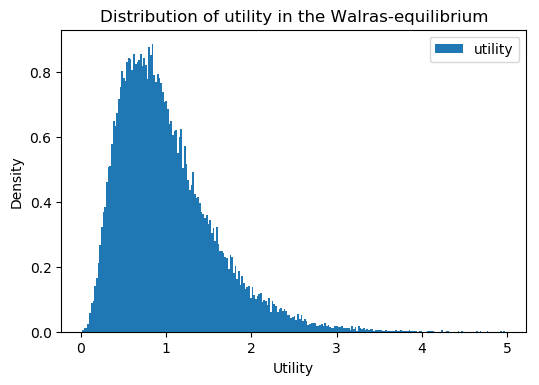

In [40]:
def utility(p1,p2,e1,e2,e3,gamma_value): # Defining the utility function
    return ((x1_demand(p1,p2,e1,e2,e3)**beta_1)*(x2_demand(p1,p2,e1,e2,e3)**beta_2)*(x3_demand(p1,p2,e1,e2,e3)**beta_3))**gamma_value
fig = plt.figure(dpi=100) # Figure size
ax = fig.add_subplot(1,1,1) # Initial plot and placement
ax.hist(utility(p1_solution,p2_solution,e1,e2,e3,gamma),bins=250, density=True,label='utility') # Creates histogram
ax.set_title('Distribution of utility in the Walras-equilibrium') # Adds title
ax.set_xlabel('Utility') # Label for the x-axis
ax.set_ylabel('Density') # Label for the x-axis
ax.legend(loc='upper right'); # Creates the informational legend in the upper right corner.

In [41]:
print(f'We find that the mean = {np.mean(utility(p1_solution,p2_solution,e1,e2,e3,gamma)):.2f}') # Prints the mean based on our function and solution of the prices
print(f'And we find that the variance = {np.var(utility(p1_solution,p2_solution,e1,e2,e3,gamma)):.2f}') # Prints the variance based on our function and solution of the prices
print(f'Additionally we find that the median = {np.median(utility(p1_solution,p2_solution,e1,e2,e3,gamma)):.2f}') # Prints the median based on our function and solution of the prices

We find that the mean = 1.01
And we find that the variance = 0.32
Additionally we find that the median = 0.90


Looking at the illustration it seems that the distribution is skewed to the right, indicating a larger amount of observations below the mean than above it. Which we also see from our results, as the median is below the mean. This means that few consumers gain much higher utiltiy than others and many consumers obatin lower utility than the mean.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

In [42]:
# We start by defining our new endowments which we set so every consumer gets the same and we the find the walras-equilibrium
e1_new = np.ones(N) * np.sum(e1)/N # Creates a vector of N elements of the value 1, then multiplies it with the total amount of x_1/N
e2_new = np.ones(N) * np.sum(e2)/N # Creates a vector of N elements of the value 2, then multiplies it with the total amount of x_2/N
e3_new = np.ones(N) * np.sum(e3)/N # Creates a vector of N elements of the value 3, then multiplies it with the total amount of x_3/N
p_solutions_new=Walras(p1,p2,e1_new,e2_new,e3_new) # Solves for the new endowments.

  0: p1=       5.0821 -> excess demand for good 1 ->     20524.5811   p2 =       4.9144 -> excess demand for good 2 ->    -21406.7112
  1: p1=       5.1596 -> excess demand for good 1 ->     19366.5169   p2 =       4.8307 -> excess demand for good 2 ->    -20921.7764
  2: p1=       5.2327 -> excess demand for good 1 ->     18289.6922   p2 =       4.7489 -> excess demand for good 2 ->    -20438.6104
  3: p1=       5.3019 -> excess demand for good 1 ->     17285.4132   p2 =       4.6691 -> excess demand for good 2 ->    -19956.9918
  4: p1=       5.3673 -> excess demand for good 1 ->     16346.3192   p2 =       4.5912 -> excess demand for good 2 ->    -19476.7761
   ...
250: p1=       6.4926 -> excess demand for good 1 ->        -6.0229   p2 =       2.6197 -> excess demand for good 2 ->        -2.2573
500: p1=       6.4886 -> excess demand for good 1 ->        -2.4139   p2 =       2.6182 -> excess demand for good 2 ->        -0.9018
750: p1=       6.4870 -> excess demand for good 1 ->   

In [43]:
# We set append the solutions of the walras equilibrium to the 2 price levels.
p1_solution_new=p_solutions_new[0]
p2_solution_new=p_solutions_new[1]

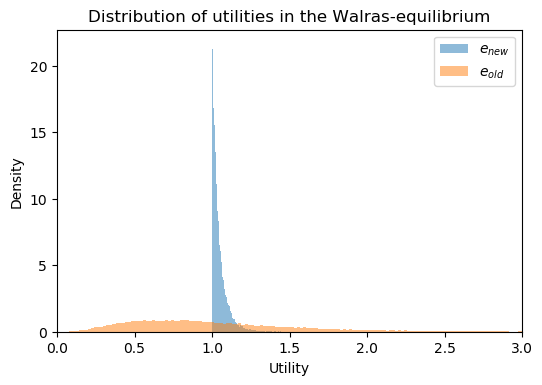

In [44]:
# We plot a figure of our earlier walras equilibrium and our new
fig = plt.figure(dpi=100) 
ax = fig.add_subplot(1,1,1) # Adds subplot
ax.hist(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,gamma),bins=250,density=True,alpha=0.5,label='$e_{new}$') # Adds new histogram of utility
ax.hist(utility(p1_solution,p2_solution,e1,e2,e3,gamma),bins=250,density=True,alpha=0.5,label='$e_{old}$') # Adds old histogram of utility
ax.set_title('Distribution of utilities in the Walras-equilibrium') # Adds title
ax.set_xlabel('Utility') # Adds label
ax.set_ylabel('Density') # Adds label
ax.set_xlim(0,3) # Limits the x-axis 
ax.legend(loc='upper right'); # Adds legend

In [46]:
# Prints the mean and variance
print(f'We get a new mean = {np.mean(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,gamma)):.2f}')
print(f'And we get the following variance = {np.var(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,gamma)):.2f}')

We get a new mean = 1.05
And we get the following variance = 0.00


From the illustration we see that no consumer recieve less than 1 utility when the goods are distributed equally among them. It's also seen that the density is much higher, giving a smaller varaince in the utility that the consumers obtain.

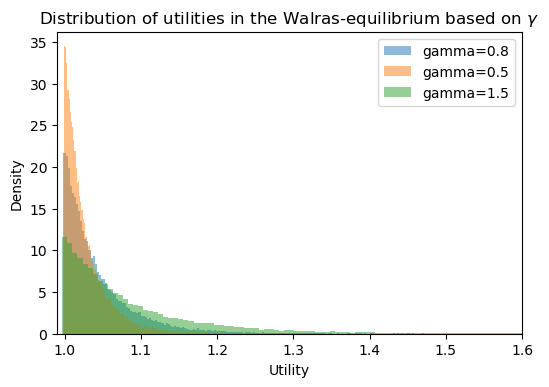

In [47]:
# Next we plot the new utility function with 3 different values of gamma 
fig = plt.figure(dpi=100) 
ax = fig.add_subplot(1,1,1) # Adds subplot
ax.hist(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,gamma),bins=250,density=True,alpha=0.5,label='gamma=0.8') # Adds histogram of utility with gamma equal to the initial value
ax.hist(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,0.5),bins=250,density=True,alpha=0.5,label='gamma=0.5') # Adds histogram of utility with gamma = 0.5
ax.hist(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,1.5),bins=250,density=True,alpha=0.5,label='gamma=1.5') # Adds histogram of utility with gamma = 1.5
ax.set_title('Distribution of utilities in the Walras-equilibrium based on $\gamma$') # Adds title
ax.set_xlabel('Utility') # Add label
ax.set_ylabel('Density') # Adds label
ax.set_xlim(0.99,1.6) # Limits the x-axis
ax.legend(loc='upper right'); # Adds legend

In [48]:
# Print the mean and variance for the 3 plottet histograms above.

# For gamma = 0.8 (initial value)
print('\033[1m' + 'Gamma=0.8:')
print('\033[0m' + f'Mean = {np.mean(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,gamma)):.2f}') 
print(f'Variance = {np.var(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,gamma)):.6f}') 

print('') 

# For gamma = 0.5
print('\033[1m' + 'Gamma=0.5:')
print('\033[0m' + f'Mean = {np.mean(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,0.5)):.2f}') 
print(f'Variance = {np.var(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,0.5)):.6f}') 

print('') 

# For gamma = 1.5
print('\033[1m' + 'Gamma=1.5:')
print('\033[0m' + f'Mean = {np.mean(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,1.5)):.2f}') 
print(f'Variance = {np.var(utility(p1_solution_new,p2_solution_new,e1_new,e2_new,e3_new,1.5)):.6f}') 

Gamma=0.8:
Mean = 1.05
Variance = 0.003017

Gamma=0.5:
Mean = 1.03
Variance = 0.001083

Gamma=1.5:
Mean = 1.09
Variance = 0.013079


We find that the variance and mean increases as $\gamma$ increases. This makes sense as a higher $\gamma$ increases the utility gap between the consumers with small $\beta$-values and the ones with higher $\beta$-values, hence increases inequality.
However, a higher $\gamma$ is benefitical to all consumers in this setting, as there is no envy incorporated in the model. A higher $\gamma$ will therefore increase the averge utility for the consumers and at worst provide the same utility for some, but also increase the utility gap amongst them.